<a href="https://colab.research.google.com/github/fotrino/text-mining/blob/main/TM%20-%20TP%20Wikipedia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Run only if libraries are not installed

In [1]:
%%capture

import os
import nltk
nltk.download('all')

In [2]:
%%capture

! pip install -U spacy
! python -m spacy download es_core_news_lg
! python -m spacy download es

! pip install wikipedia

### Get Data from Wikipedia

In [3]:
import wikipedia

In [4]:
wikipedia.set_lang("es")

subject = ['Argentina']

wikiPage = wikipedia.page(wikipedia.search(subject)[0]).content

#### Original Text

In [5]:
wikiPage[:1500]

'Argentina, oficialmente República Argentina,[e]\u200b es un país soberano de América del Sur, ubicado en el extremo sur y sudeste de dicho subcontinente. Adopta la forma de gobierno republicana, democrática, representativa y federal.\nLa Argentina está organizada como un Estado federal descentralizado, integrado desde 1994 por un Estado nacional y 24 jurisdicciones de primer orden[12]\u200b o estados autogobernados,[13]\u200b[14]\u200b que son 23 provincias y la Ciudad Autónoma de Buenos Aires (CABA), esta última designada como Capital Federal del país. Todos los estados autogobernados tienen constitución, bandera y fuerza de seguridad propios. Las 23 provincias mantienen todos los poderes no delegados al Estado nacional, tienen tres poderes autónomos y garantizan la autonomía de sus municipios.[15]\u200b[16]\u200b \nIntegra el Mercosur —bloque del que fue fundador en 1991—, la Comunidad de Estados Latinoamericanos y Caribeños (CELAC) y la Organización de Estados Americanos (OEA).\nEn

### Pre-Processing

In [6]:
import re
import os
import spacy
import pprint
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.text import Text

pp = pprint.PrettyPrinter(compact=True)

In [7]:
def pre_processsing(text):
    spanish_stops = set(stopwords.words('spanish'))
    spanish_stops.update(string.punctuation)
    nlp = spacy.load("es_core_news_lg")

    text = re.sub('\[[a-zA-Z0-9]+\]\\u200b|=|\`|\'|—|\"|\»|\«|\º|\“|[0-9]', '', text)
    text = word_tokenize(text)
    text = [x.lower() for x in text if x.lower() not in spanish_stops]

    text = nlp(" ".join(text))
    text = [token.lemma_ for token in text ]

    return text

#### Processed Result

In [8]:
results = pre_processsing(wikiPage)
pp.pprint(results[:1500])

['argentino', 'oficialmente', 'repúblico', 'argentino', 'país', 'soberano',
 'américo', 'sur', 'ubicado', 'extremo', 'sur', 'sudeste', 'dicho',
 'subcontinente', 'adoptar', 'forma', 'gobierno', 'republicano', 'democrático',
 'representativo', 'federal', 'argentino', 'organizado', 'federal',
 'descentralizado', 'integrado', 'nacional', 'jurisdicción', 'primero', 'orden',
 'autogobernado', 'provincia', 'ciudad', 'autónomo', 'buen', 'aire', 'car',
 'último', 'designado', 'capital', 'federal', 'país', 'autogobernado',
 'constitución', 'bandero', 'fuerza', 'seguridad', 'propio', 'provincia',
 'mantener', 'poder', 'delegado', 'nacional', 'tres', 'poder', 'autónomo',
 'garantizar', 'autonomía', 'municipio', 'integrar', 'mercosur', 'bloque',
 'fundador', 'comunidad', 'latinoamericano', 'caribeño', 'celac',
 'organización', 'americano', 'oea', 'índice', 'desarrollo', 'humano', 'idh',
 'ubicando él', 'grupo', 'país', 'desarrollo', 'humano', 'alto', 'puesto',
 'ajustado', 'desigualdad', 'argentin

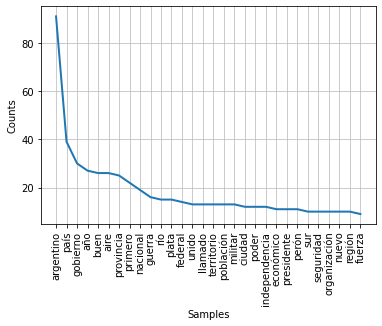

In [9]:
Text(results).plot(30)